# Data Exploration

In [3]:
# Importar biblioteca
import pandas as pd
# Carregar a flatTable
flatTable = pd.read_csv(r"C:\Users\Egomes\Desktop\PG_Analytics_Data_science_empresarial\Isla_gaia\14-ProjetoII\projetoII\dataStaging\flatTable.csv")
# Converter a coluna "date" para o tipo data
flatTable['date'] = pd.to_datetime(flatTable['date'])

In [4]:
# Ver informação
flatTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8583762 entries, 0 to 8583761
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     int64         
 1   store_id               object        
 2   product_id             object        
 3   date                   datetime64[ns]
 4   sales                  float64       
 5   revenue                float64       
 6   stock                  float64       
 7   price                  float64       
 8   promo_type_1           object        
 9   promo_bin_1            object        
 10  promo_type_2           object        
 11  promo_bin_2            object        
 12  promo_discount_2       float64       
 13  promo_discount_type_2  object        
 14  product_length         float64       
 15  product_depth          float64       
 16  product_width          float64       
 17  cluster_id             object        
 18  hierarchy1_id         

In [6]:
# Quantas lojas existem nos dados
len(flatTable['store_id'].unique())

63

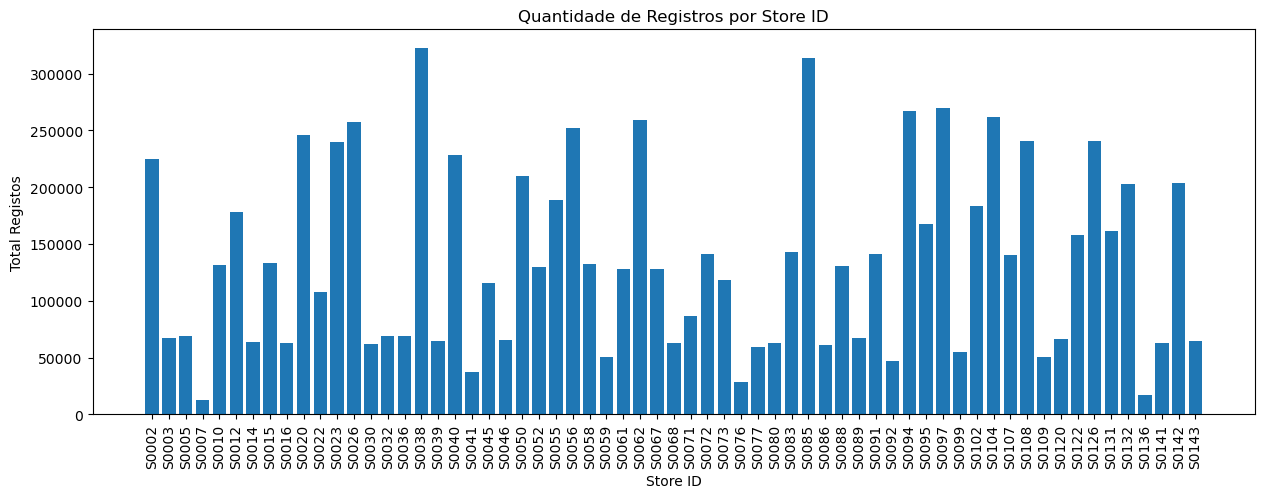

In [7]:
# Quantos registos existem por loja
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.bar(flatTable.groupby('store_id').size().index, flatTable.groupby('store_id').size().values)
# Adicionar rótulos e título
plt.xlabel('Store ID')
plt.ylabel('Total Registos')
plt.title('Quantidade de Registros por Store ID')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
# Ver quantidade de products_id distintos existentes nos dados
len(flatTable['product_id'].unique())

600

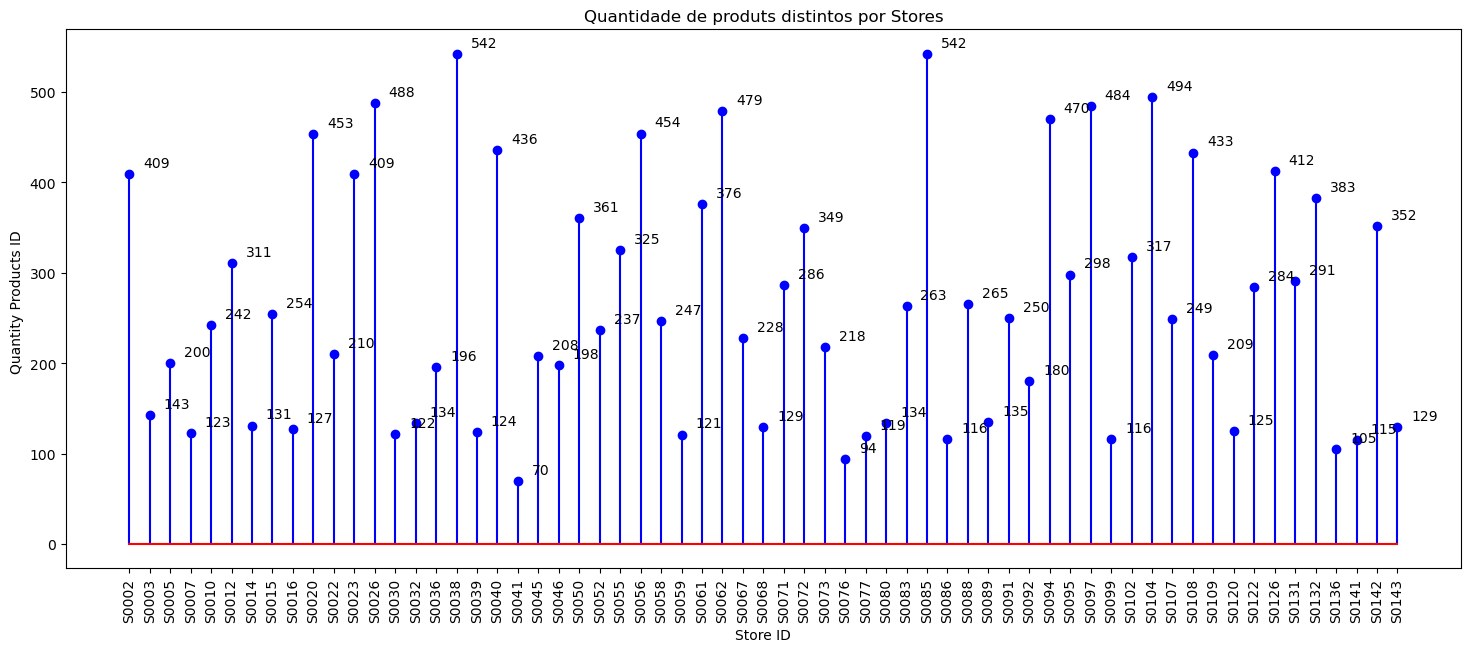

In [12]:
# Ver grafico de unicos product_id por store_id
x = flatTable.groupby('store_id')['product_id'].nunique().keys()
y = list(flatTable.groupby('store_id')['product_id'].nunique().values)

# Criar uma figura e eixos
fig, ax = plt.subplots(figsize=(18, 7))

# Configurar o estilo do marcador e linha
markerline, stemlines, baseline = ax.stem(x, y, linefmt="b-", markerfmt="bo", basefmt="r-")

# Configurar rótulos dos eixos
ax.set_xlabel('Store ID')
plt.xticks(rotation='vertical')
ax.set_ylabel('Quantity Products ID ')
# Configurar título do gráfico
ax.set_title('Quantidade de produts distintos por Stores')
# Adicionar rótulos aos pontos
for i in range(len(x)):
    ax.annotate(y[i], (x[i], y[i]), xytext=(10, 5), textcoords='offset points')
plt.show()

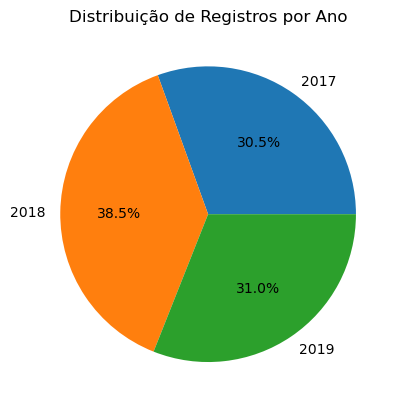

In [15]:
# Ver Registos por ano dos dados
flatTable.groupby(flatTable['date'].dt.year).size().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição de Registros por Ano')
plt.show()

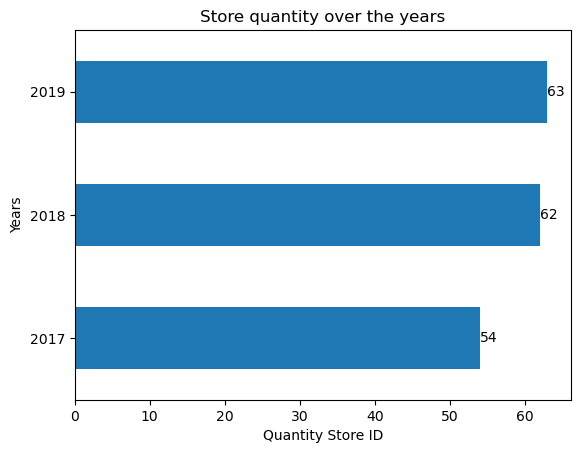

In [17]:
# Quantidade de lojas ao longo dos anos
flatTable.groupby(flatTable['date'].dt.year)['store_id'].nunique().plot.barh()
plt.title('Store quantity over the years')
plt.xlabel('Quantity Store ID')
plt.ylabel('Years')
for i, v in enumerate(flatTable.groupby(flatTable['date'].dt.year)['store_id'].nunique()):
    plt.text(v, i, str(v), color='black', va='center')
plt.show()

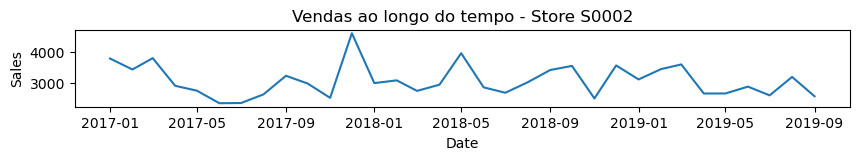

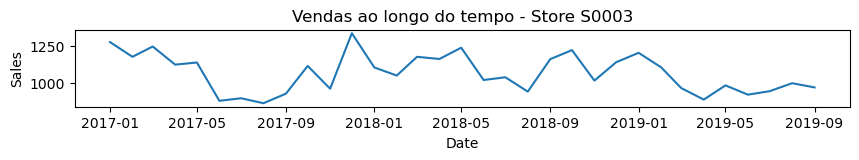

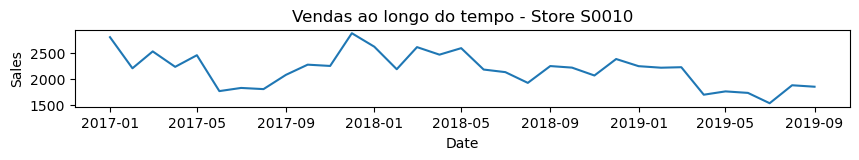

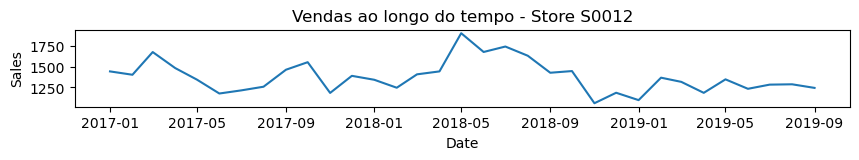

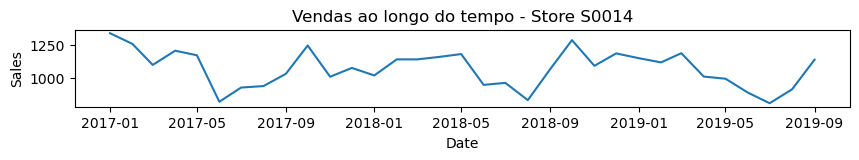

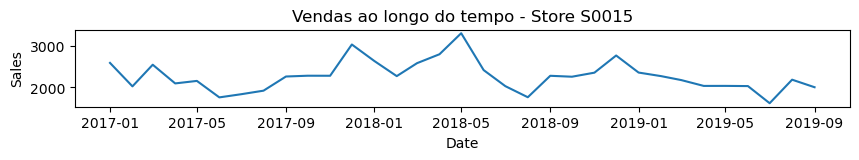

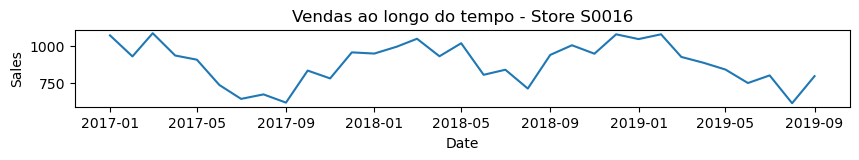

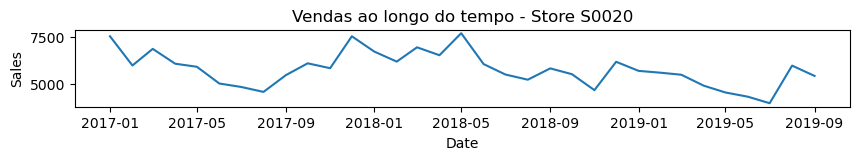

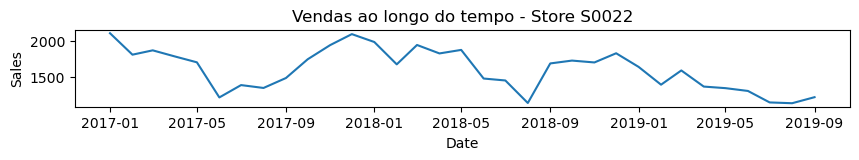

In [18]:
# Ver series temporais vs sales de 10 lojas
x = flatTable.groupby([flatTable['date'].dt.to_period('M'),'store_id'])['sales'].sum().reset_index()
x['date'] = x['date'].dt.to_timestamp()
# Obter a lista de todas as lojas
stores = x['store_id'].unique()
# Loop sobre cada store_id e plotar o gráfico individual
i = 1
for store_id in stores:
    if i < 10 :
        store_data = x[x['store_id'] == store_id]  
        # Criar uma figura e eixos para cada loja
        fig, ax = plt.subplots(figsize=(10, 1)) 
        # Plotar o gráfico de linha das vendas para a loja
        ax.plot(store_data['date'], store_data['sales']) 
        # Configurar rótulos dos eixos e título
        ax.set_xlabel('Date')
        ax.set_ylabel('Sales')
        ax.set_title('Vendas ao longo do tempo - Store {}'.format(store_id))
        # Mostrar o gráfico
        plt.show() 
        i +=1

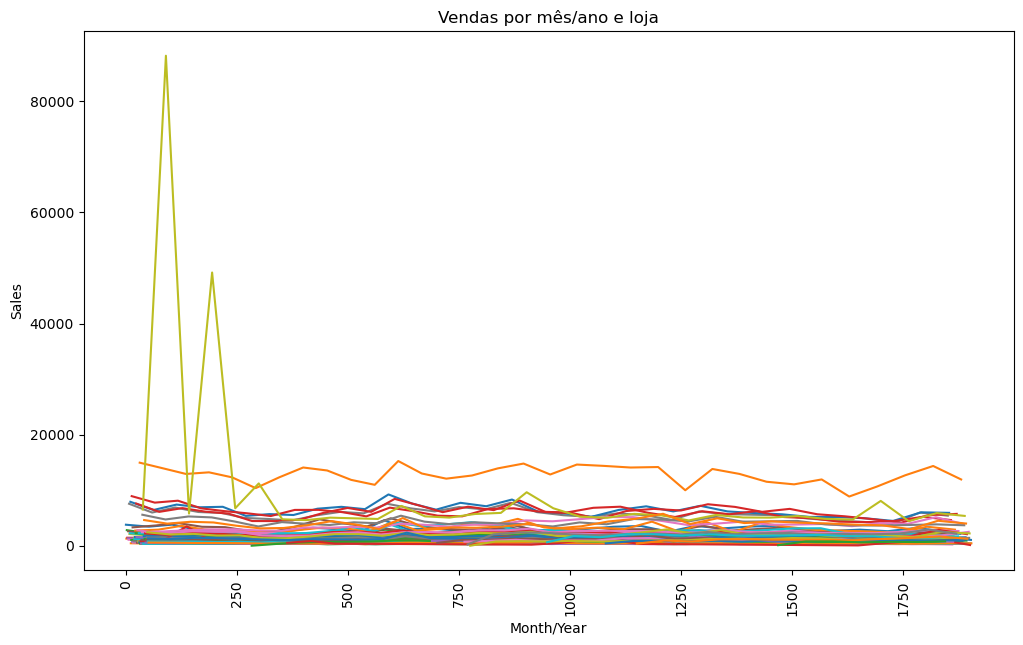

In [19]:
# Ver vendas mês/ Loja
# Criar uma figura e eixos
fig, ax = plt.subplots(figsize=(12, 7))
# Iterar sobre as lojas e plotar as linhas de vendas
for store_id in x['store_id'].unique():
    store_sales = x[x['store_id'] == store_id]
    label = 'Store {}'.format(store_id)
    ax.plot(store_sales.index, store_sales['sales'], label=label)
# Configurar rótulos dos eixos
ax.set_xlabel('Month/Year')
plt.xticks(rotation='vertical')
ax.set_ylabel('Sales')
ax.set_title('Vendas por mês/ano e loja')
plt.show()

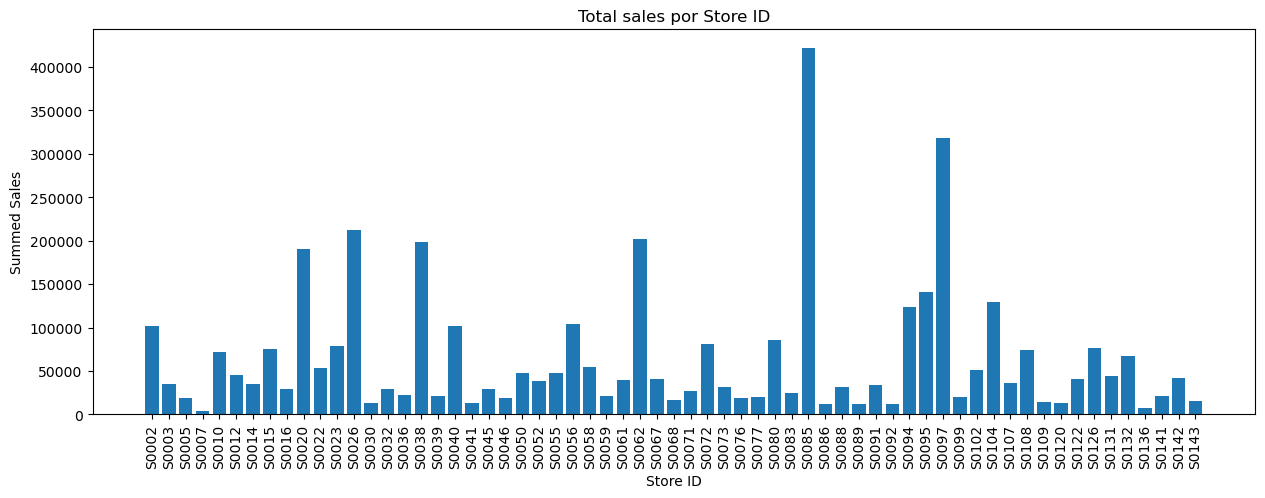

In [20]:
# explorar variável sales por store_id
plt.figure(figsize=(15, 5))
plt.bar(flatTable.groupby('store_id')['sales'].sum().index, flatTable.groupby('store_id')['sales'].sum().values)
# Adicionar rótulos e título
plt.xlabel('Store ID')
plt.ylabel('Summed Sales')
plt.title('Total sales por Store ID')
plt.xticks(rotation='vertical')
plt.show()

### promo_type_1 

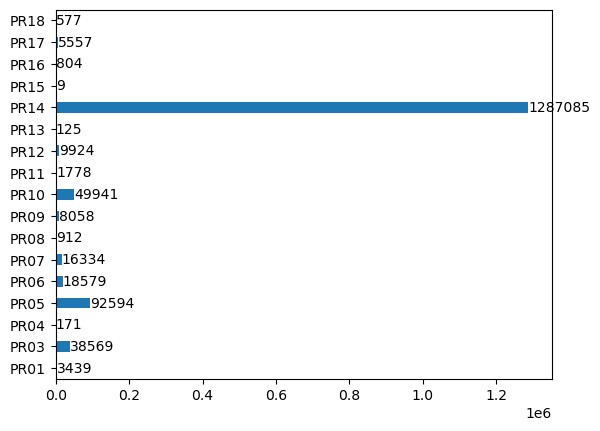

In [117]:
# Ver registos por promo_type_1 
flatTable.groupby('promo_type_1').size().plot.barh()
plt.title('')
plt.xlabel('')
plt.ylabel('')
for i, v in enumerate(flatTable.groupby('promo_type_1').size()):
    plt.text(v, i, str(v), color='black', va='center')
plt.show()

### Vizualizar numero de Lojas por localização city

In [28]:
import folium
city_view = flatTable[['city_code','latitude','longitude']]
city_view=city_view.groupby(['city_code','latitude','longitude']).size().reset_index(name='nr_stores')
# Criar um mapa centrado na Turquia co rotulos da quantidade de lojas
mapa = folium.Map(location=[39.9334, 32.8597], zoom_start=6)
# Adicionar marcadores e rótulos para cada cidade
for _, row in city_view.iterrows():
    marker = folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['city_code']
    )
    marker.add_to(mapa)

    # Adicionar rótulo de etiqueta com o número de lojas
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html='<div style="font-size: 12pt; color: red;">{}</div>'.format(row['nr_stores'])
        )
    ).add_to(mapa)

mapa